# Project Name: Bank Customer Churn Prediction

 
### 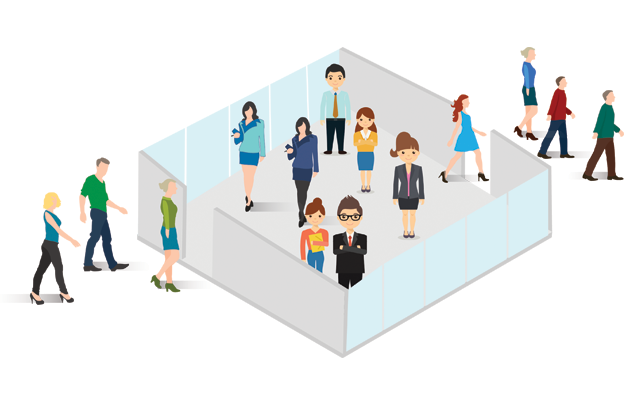

## Context: 
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplist the following for this study:

- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

In [65]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('train.csv')

# Separate features and target variable
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Define categorical and numerical features
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
clf1.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf1.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8575453691641167


----------------
----------------

In [94]:
# Load the dataset
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('Churn_Modelling.csv')
test = pd.read_csv('test.csv')
data = pd.concat([data1, data2])
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


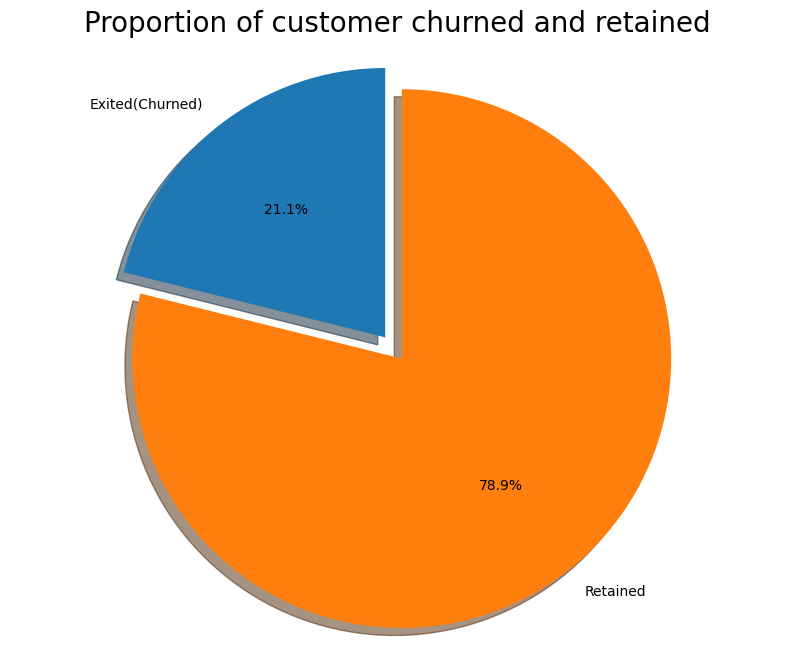

In [91]:
labels = 'Exited(Churned)', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

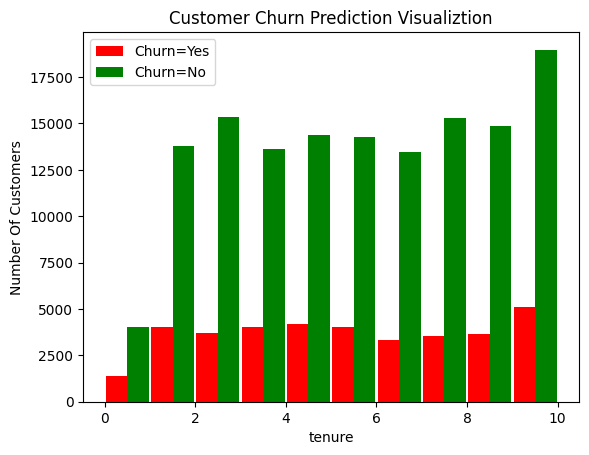

In [93]:
tenure_churn_no = data[data.Exited==0].Tenure
tenure_churn_yes = data[data.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

<Axes: xlabel='IsActiveMember', ylabel='count'>

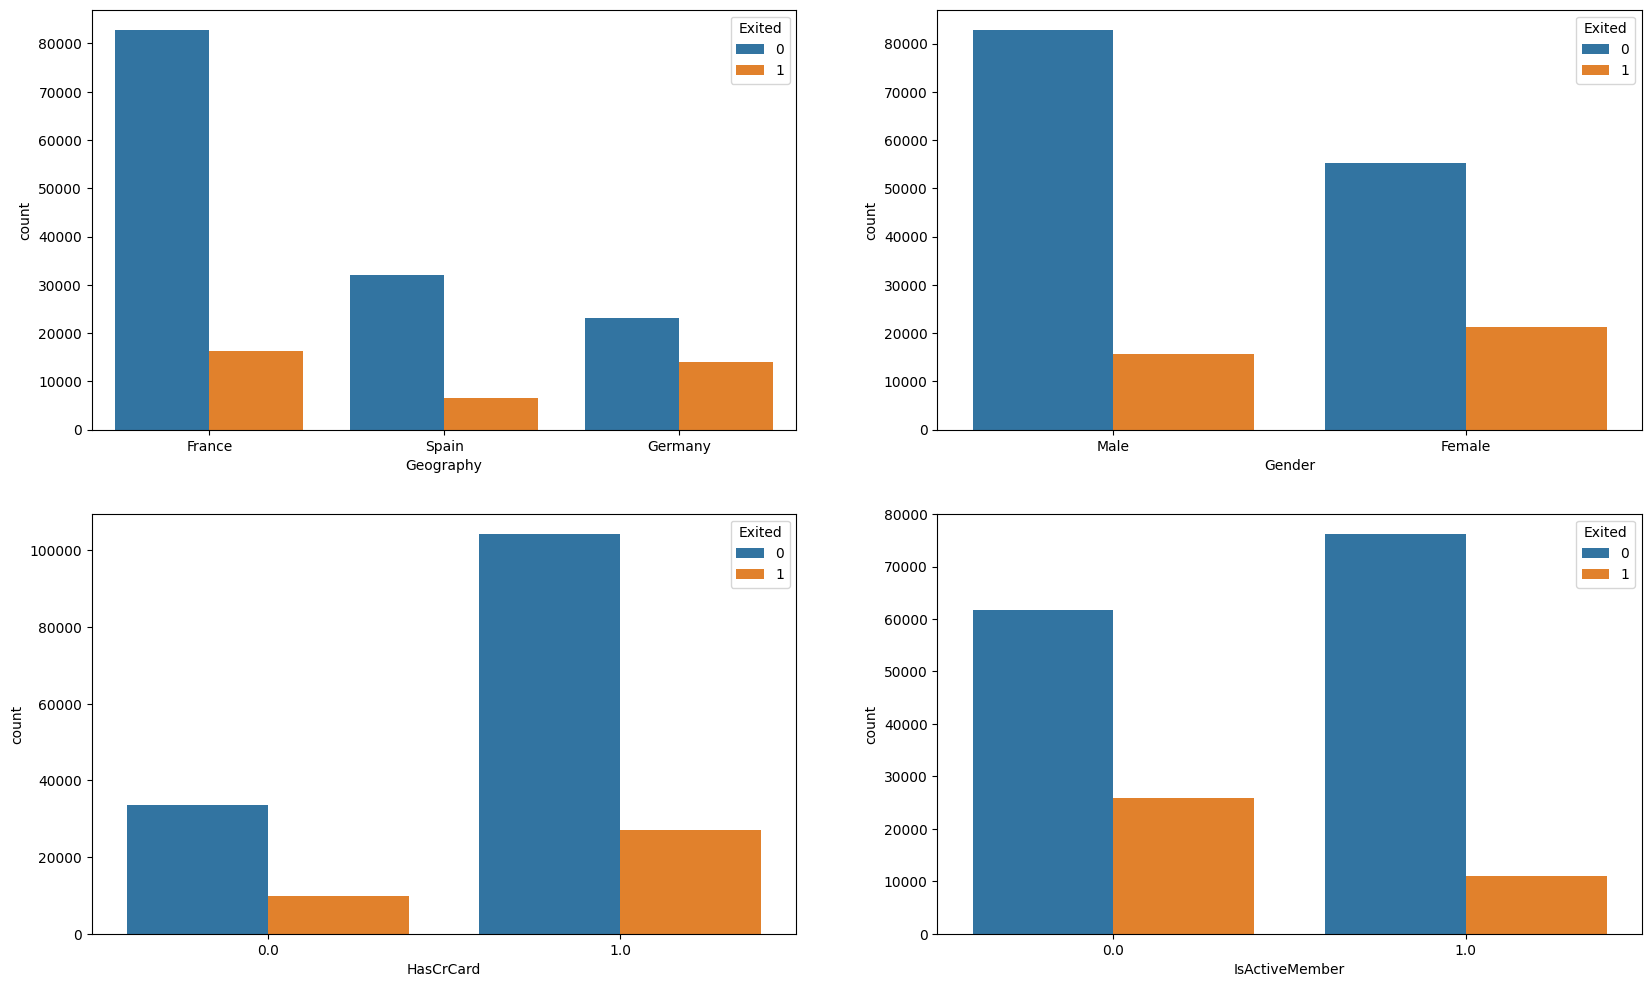

In [95]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

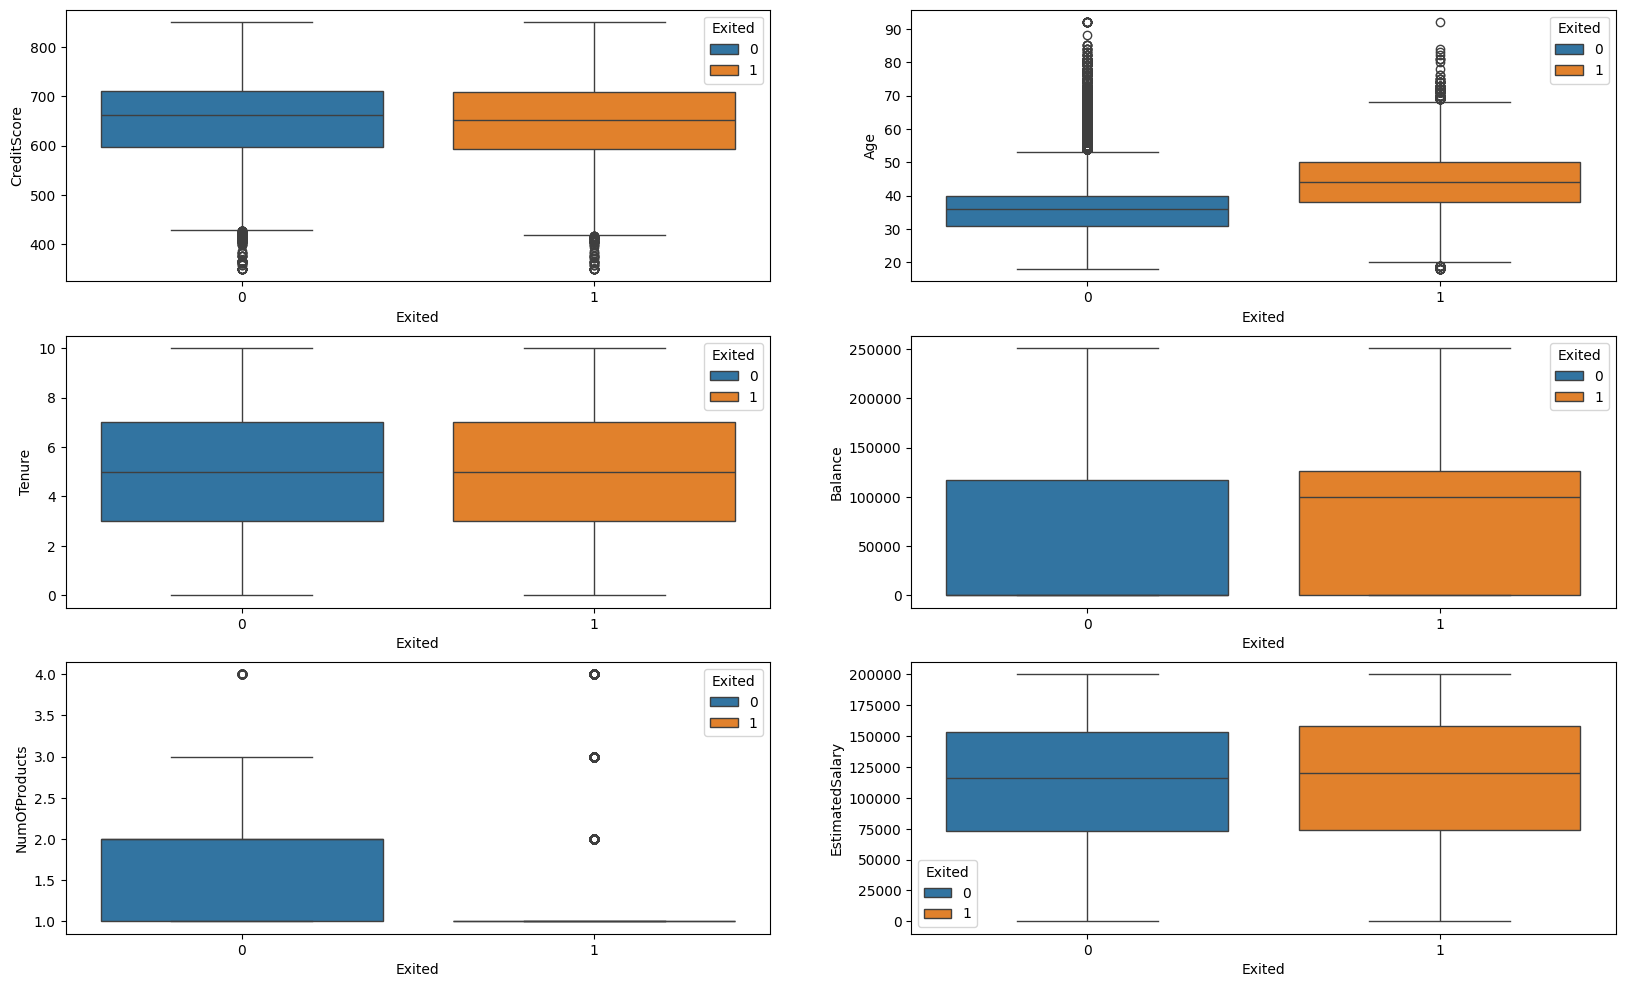

In [96]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

In [47]:
# Imputing null values in numeric data type
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Geography'].fillna(data['Geography'].mode()[0], inplace=True)
data['HasCrCard'].fillna(data['HasCrCard'].mode()[0], inplace=True)
data['IsActiveMember'].fillna(data['IsActiveMember'].mode()[0], inplace=True)

In [48]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [49]:
# dictionary to store the metrics
metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

def assigning_metric_scores(model_name, y_test, y_pred):
    model = model_name
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict['Model'].append(model)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

def print_report_matrix(model_name, y_test, y_pred):
    c_report = classification_report(y_test, y_pred)
    print(f"\nClassification Report of {model_name}:\n\n{c_report}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [50]:
numeric_cols = ['Age','CreditScore', 'Balance','EstimatedSalary']
#Use Loop Function
for col in numeric_cols:
    sc = MinMaxScaler()
    data[col+"_scaled"] = sc.fit_transform(data[[col]])
    test[col+"_scaled"] = sc.fit_transform(test[[col]])

In [51]:
def get_vectors(df_train,df_test,col_name):

    vectorizer = TfidfVectorizer(max_features=1000)
    vectors_train = vectorizer.fit_transform(df_train[col_name])
    vectors_test = vectorizer.transform(df_test[col_name])
    
    #Dimensionality Reduction Using SVD ( Singular Value Decompostion)
    svd = TruncatedSVD(3)
    x_sv_train = svd.fit_transform(vectors_train)
    x_sv_test = svd.transform(vectors_test)

    # Convert to DataFrames
    tfidf_df_train = pd.DataFrame(x_sv_train)
    tfidf_df_test = pd.DataFrame(x_sv_test)

    # Naming columns in the new DataFrames
    cols = [(col_name + "_tfidf_" + str(f)) for f in tfidf_df_train.columns.to_list()]
    tfidf_df_train.columns = cols
    tfidf_df_test.columns = cols

    # Reset the index of the DataFrames before concatenation
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Concatenate transformed features with original data
    df_train = pd.concat([df_train, tfidf_df_train], axis="columns")
    df_test = pd.concat([df_test, tfidf_df_test], axis="columns")
    return df_train,df_test

In [52]:
# Combining Customerid , Surname , Geography , and Gender , Estimated Slaray  and Making New Column in both Data Frames 
data['Sur_Geo_Gend_Sal'] = data['CustomerId'].astype('str')+data['Surname']+data['Geography']+data['Gender']+np.round(data.EstimatedSalary).astype('str')
test['Sur_Geo_Gend_Sal'] = test['CustomerId'].astype('str')+test['Surname']+test['Geography']+test['Gender']+np.round(test.EstimatedSalary).astype('str')

In [53]:
data,test = get_vectors(data,test,'Surname')
data,test = get_vectors(data,test,'Sur_Geo_Gend_Sal')

In [54]:
def feature_data(df):
    
    df['Senior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['Active_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')
    
    cat_cols = ['Geography', 'Gender', 'NumOfProducts','AgeCat']
    #onehotEncoding
    df=pd.get_dummies(df,columns=cat_cols)
    return df

In [55]:
#Genrating New Features
data = feature_data(data)
test = feature_data(test)

##Selecting Columns FOr use 
feat_cols=data.columns.drop(['CustomerId', 'Surname','Exited','Sur_Geo_Gend_Sal'])
feat_cols=feat_cols.drop(numeric_cols)

#Printing
print(feat_cols)
data.head()

Index(['Tenure', 'HasCrCard', 'IsActiveMember', 'Age_scaled',
       'CreditScore_scaled', 'Balance_scaled', 'EstimatedSalary_scaled',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Sur_Geo_Gend_Sal_tfidf_0', 'Sur_Geo_Gend_Sal_tfidf_1',
       'Sur_Geo_Gend_Sal_tfidf_2', 'Senior', 'Active_by_CreditCard',
       'Products_Per_Tenure', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'AgeCat_1',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_4', 'AgeCat_5'],
      dtype='object')


,CustomerId,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,AgeCat_1,AgeCat_2,AgeCat_3,AgeCat_4,AgeCat_5
0,15674932,Okwudilichukwu,668,33.0,3,0.00,1.0,0.0,181449.97,0,...,True,False,True,False,False,False,True,False,False,False
1,15749177,Okwudiliolisa,627,33.0,1,0.00,1.0,1.0,49503.50,0,...,True,False,True,False,False,False,True,False,False,False
2,15694510,Hsueh,678,40.0,10,0.00,1.0,0.0,184866.69,0,...,True,False,True,False,False,False,True,False,False,False
3,15741417,Kao,581,34.0,2,148882.54,1.0,1.0,84560.88,0,...,True,True,False,False,False,False,True,False,False,False
4,15766172,Chiemenam,716,33.0,5,0.00,1.0,1.0,15068.83,0,...,True,False,True,False,False,False,True,False,False,False


In [59]:
X=data[feat_cols]
y=data['Exited']

In [60]:
X.shape

(175034, 30)

In [61]:
# LightGBM Parameters
lgbParams = {'n_estimators': 1000,
             'max_depth': 25, 
             'learning_rate': 0.025,
             'min_child_weight': 3.43,
             'min_child_samples': 216, 
             'subsample': 0.782,
             'subsample_freq': 4, 
             'colsample_bytree': 0.29, 
             'num_leaves': 21}

[LightGBM] [Info] Number of positive: 36958, number of negative: 138076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2406
[LightGBM] [Info] Number of data points in the train set: 175034, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211148 -> initscore=-1.318022
[LightGBM] [Info] Start training from score -1.318022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


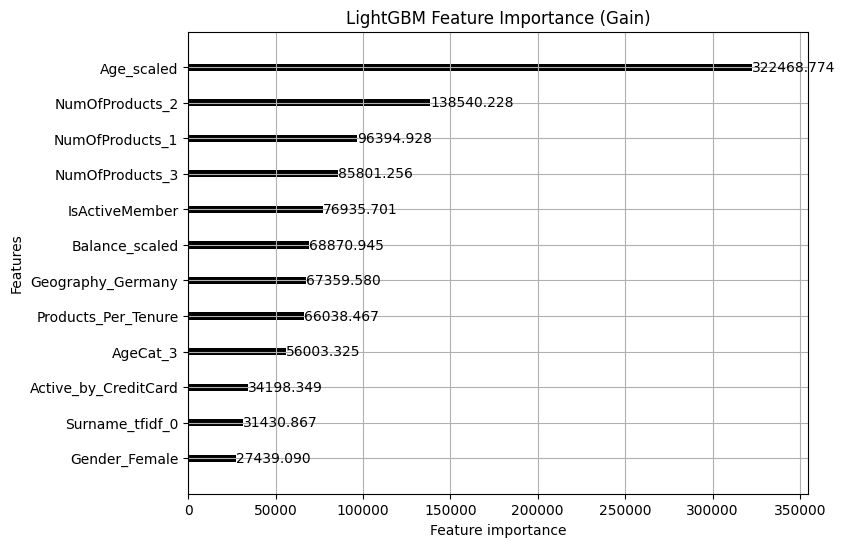

In [64]:
# Feature Importance Using LightGBM
lgb_model=lgb.LGBMClassifier(**lgbParams)
lgb_model.fit(X,y)
lgb.plot_importance(lgb_model, importance_type="gain", figsize=(8,6), max_num_features=12, color = "black",
                    title="LightGBM Feature Importance (Gain)")
plt.show()

In [68]:
# Features to use
feat_cols = X.columns

#Intilize folds 
n = 10

# Initialize StratifiedKFold
folds = StratifiedKFold(n_splits=n, random_state=42, shuffle=True)
test_preds = np.empty((n, len(test)))
auc_vals = []

# Loop through folds 
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    ''' in each iteration of the cross-validation loop, the model is trained on a specific subset 
    of the data (training set) and validated on a different subset (validation set), facilitating the evaluation of the model's performance 
    across diverse portions of the dataset.'''
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[valid_idx], y.iloc[valid_idx]
    
    #LGB Classifier
    lgb_model = lgb.LGBMClassifier(**lgbParams)
    
    #Fitting the model
    lgb_model.fit(X_train_fold, y_train_fold, eval_set=[(X_test_fold, y_test_fold)], eval_metric='auc')
    
    #Predicting on validation set and Printing Results.
    y_pred_val = lgb_model.predict_proba(X_test_fold[feat_cols])[:, 1]
    auc_val = roc_auc_score(y_test_fold, y_pred_val)
    print(f"AUC for fold {n_fold}: {auc_val}")
    auc_vals.append(auc_val)
    
    y_pred_test_light = lgb_model.predict_proba(test[feat_cols])[:, 1]
    test_preds[n_fold, :] = y_pred_test_light
    print("---------Fold Completed--------")
print('\n **** Loop finished Successfully **** ')

[LightGBM] [Info] Number of positive: 33262, number of negative: 124268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2403
[LightGBM] [Info] Number of data points in the train set: 157530, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211147 -> initscore=-1.318025
[LightGBM] [Info] Start training from score -1.318025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
AUC for fold 0: 0.8905044439856686
---------Fold Completed--------
[LightGBM] [Info] Number of positive: 33262, number of negative: 124268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2408
[LightGBM] [Info] Number of da

In [69]:
#The mean AUC value across all folds
mean_auc_light = np.mean(auc_vals)
print(f"\nMean AUC Of LightGBM : {mean_auc_light}")


Mean AUC Of LightGBM : 0.8931485323170254


In [74]:
len(test_preds)

10

In [73]:
test.shape

(110023, 38)

In [75]:
# Take the mean of predictions across all folds
final_test_preds = np.mean(test_preds, axis=0)

In [78]:
final_test_preds

array([0.01822392, 0.73038035, 0.02877454, ..., 0.01099023, 0.16556896,
       0.15368744])

In [86]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({'id': test['id'], 'Exited': final_test_preds})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission1.csv', index=False)
# 
print("Submission file created successfully!")

Submission file created successfully!


In [87]:
# Features to use
feat_cols = X.columns

#Intilize folds 
n = 5

#Cat_features
cat_features = np.where(X.dtypes != np.float64)[0]

# Initialize StratifiedKFold
folds = StratifiedKFold(n_splits=n, random_state=42, shuffle=True)
test_preds = np.empty((n, len(test)))
auc_vals_cat = []

# Loop through folds 
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    ''' in each iteration of the cross-validation loop, the model is trained on a specific subset 
    of the data (training set) and validated on a different subset (validation set), facilitating the evaluation of the model's performance 
    across diverse portions of the dataset.'''
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_test_fold, y_test_fold = X.iloc[valid_idx], y.iloc[valid_idx]
    
    train_pool = Pool(X_train_fold, y_train_fold,cat_features=cat_features)
    val_pool = Pool(X_test_fold, y_test_fold,cat_features=cat_features)
    
    cat_model = CatBoostClassifier(
    eval_metric='AUC',
    learning_rate=0.022,
    iterations=1000)
    cat_model.fit(train_pool, eval_set=val_pool,verbose=False)
    
    #Predicting Prohabilites 
    y_pred_val_cat = cat_model.predict_proba(X_test_fold[feat_cols])[:,1]
    auc_val = roc_auc_score(y_test_fold, y_pred_val_cat)
    print("AUC for fold ",n_fold,": ",auc_val)
    auc_vals_cat.append(auc_vals)
    
    y_pred_test_cat = cat_model.predict_proba(test[feat_cols])[:,1]
    test_preds[n_fold, :] = y_pred_test_cat
    print(f"------- Loop Completed for Fold {n_fold} --------")

AUC for fold  0 :  0.8909862319436451
------- Loop Completed for Fold 0 --------
AUC for fold  1 :  0.8914108395979662
------- Loop Completed for Fold 1 --------
AUC for fold  2 :  0.8901789290436763
------- Loop Completed for Fold 2 --------
AUC for fold  3 :  0.8955919627327829
------- Loop Completed for Fold 3 --------
AUC for fold  4 :  0.8901758658328794
------- Loop Completed for Fold 4 --------


In [88]:
#The mean AUC value across all folds
mean_auc_light = np.mean(auc_vals_cat)
print(f"\nMean AUC Of CatBoost : {mean_auc_light}")


Mean AUC Of CatBoost : 0.8931485323170252


# Project Name: Bank Customer Churn Prediction

# Project Name: Bank Customer Churn Prediction